In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Measurement data

The PeakTech 2005 multimeter was used to obtain voltage values. Its accuracy is ±(0.5 % of reading + 3 digits). 0.5% is the systematic error, while 0.03 is random noise that shrinks when averaging. Since we measure the average of 3 elements, 0.03 was divided by sqrt(3) to obtain the random error for the averaged value. To obtain the final absolute error of the average, obtained relative and absolute uncertainties were combined in quadrature. To obtain the final absolute error for a natural logarithm of average, each absolute error of average was divided by this average.   
All data were extracted to .csv format. All values have been rounded to two decimal places, however, precise values have been used for calculations. 

In [2]:
V_rel_err = 0.005
digit_term = 0.03
V_av_abs_err = digit_term/np.sqrt(3)

def export_setup(times, run1, run2, run3, avg, avg_abs, avg_log, avg_log_abs, path):
    df = pd.DataFrame({
        "Time [s]": times,
        "V1_1 [V]": run1,
        "V1_2 [V]": run2,
        "V1_3 [V]": run3,
        "Average [V]": avg.round(2),
        "σ_V [V]": avg_abs.round(2),
        "ln(Average)": avg_log.round(2),
        "σ_ln": avg_log_abs.round(2),
    })
    df.to_csv(path, index=False)
    return df

### First setup

In the first setup, one capacitor with capacitance of 30 μF and one resistor with resistance of 1 MΩ were connected to the power supply and the multimeter. The power supply was then turned on with a voltage of 12 V. The recording of the multimeter were recorded every 5 seconds. The measurement was repeated 3 times. The data obtained is presented in the lists below.  

In [3]:
times_1 = np.arange(0, 75, 5)
V1_1 = [12, 10.22, 8.43, 7.06, 5.83, 4.88, 4.03, 3.37, 2.78, 2.30, 1.92, 1.59, 1.33, 1.10, 0.93]
V1_2 = [12, 10.22, 8.44, 7.07, 5.84, 4.89, 4.03, 3.38, 2.79, 2.30, 1.93, 1.59, 1.33, 1.10, 0.92]
V1_3 = [12, 10.13, 8.48, 7.00, 5.87, 4.84, 4.06, 3.35, 2.81, 2.31, 1.94, 1.60, 1.32, 1.10, 0.91]
V1 = (np.array(V1_1) + np.array(V1_2) + np.array(V1_3))/3
V1_abs = np.sqrt((V1*V_rel_err)**2 + V_av_abs_err**2)
V1_log = np.log(V1)
V1_log_abs = V1_abs/V1

df_setup1 = export_setup(
    times_1,
    V1_1, V1_2, V1_3,
    V1, V1_abs, V1_log, V1_log_abs,
    "data/setup1_full.csv",
)

R1 = 1e6
C1 = 30e-6

### Second setup 

In the second setup, a second resistor with resistance of 1 MΩ was connected in series to the first one, so the total resistance was now 2 MΩ. The same measurement was repeated 3 times. The data obtained is presented in the lists below.

In [4]:
times_2 = np.arange(0, 130, 5)
V2_1 = [12, 11.03, 10.01, 9.02, 8.12, 7.37, 6.70, 6.03, 5.47, 4.97, 4.47, 4.00, 3.63, 3.27, 
        2.97, 2.67, 2.43, 2.18, 1.98, 1.79, 1.62, 1.46, 1.31, 1.19, 1.08, 0.97]
V2_2 = [12, 11.02, 9.92, 9.08, 8.18, 7.37, 6.69, 6.03, 5.47, 4.92, 4.43, 4.03, 3.63, 3.29, 
        2.96, 2.67, 2.42, 2.18, 1.98, 1.78, 1.62, 1.46, 1.32, 1.28, 1.08, 0.97]
V2_3 = [12, 11.09, 9.99, 9.07, 8.16, 7.35, 6.68, 6.06, 5.46, 4.92, 4.46, 4.02, 3.65, 3.29, 
        2.98, 2.69, 2.42, 2.20, 1.98, 1.80, 1.62, 1.45, 1.32, 1.19, 1.08, 0.97]
V2 = (np.array(V2_1) + np.array(V2_2) + np.array(V2_3))/3
V2_abs = np.sqrt((V2*V_rel_err)**2 + V_av_abs_err**2)
V2_log = np.log(V2)
V2_log_abs = V2_abs/V2

df_setup2 = export_setup(
    times_2,
    V2_1, V2_2, V2_3,
    V2, V2_abs, V2_log, V2_log_abs,
    "data/setup2_full.csv",
)

R2 = 2e6
C2 = 30e-6

### Third setup

In the third setup, a third resistor with resistance of 1 MΩ was connected in series to the previous setup, so the total resistance was now 3 MΩ. The same measurement was repeated 3 times. The data obtained is presented in the lists below.

In [5]:
times_3 = np.arange(0, 180, 5)
V3_1 = [12, 11.37, 10.60, 9.83, 9.17, 8.45, 7.88, 7.39, 6.82, 6.36, 5.89, 5.50, 5.07, 4.72, 4.41, 4.05, 3.81, 3.55, 3.25, 
        3.05, 2.83, 2.64, 2.45, 2.27, 2.13, 1.97, 1.83, 1.70, 1.59, 1.48, 1.37, 1.27, 1.18, 1.10, 1.02, 0.95]
V3_2 = [12, 11.36, 10.53, 9.82, 9.10, 8.49, 7.87, 7.34, 6.81, 6.31, 5.89, 5.46, 5.06, 4.72, 4.48, 4.08, 3.80, 3.53, 3.27, 
        3.09, 2.83, 2.64, 2.45, 2.28, 2.13, 1.97, 1.83, 1.70, 1.58, 1.46, 1.38, 1.27, 1.18, 1.10, 1.02, 0.94]
V3_3 = [12, 11.38, 10.55, 9.78, 9.07, 8.51, 7.89, 7.31, 6.82, 6.32, 5.90, 5.41, 5.01, 4.73, 4.38, 4.09, 3.79, 3.53, 3.28, 
        3.04, 2.83, 2.63, 2.45, 2.28, 2.12, 1.96, 1.83, 1.70, 1.57, 1.47, 1.36, 1.27, 1.17, 1.09, 1.02, 0.99]
V3 = (np.array(V3_1) + np.array(V3_2) + np.array(V3_3))/3
V3_abs = np.sqrt((V3*V_rel_err)**2 + V_av_abs_err**2)
V3_log = np.log(V3)
V3_log_abs = V3_abs/V3

df_setup3 = export_setup(
    times_3,
    V3_1, V3_2, V3_3,
    V3, V3_abs, V3_log, V3_log_abs,
    "data/setup3_full.csv",
)

R3 = 3e6
C3 = 30e-6

# Calculations

Using WLS (weighted least-squares) method, a best-fit linear line will be found for the set of points in each setup. The time constant will be obtained as the negative inverse of the slope of the regression line. 

In [6]:
import statsmodels.api as sm


def calculate_time_constant(times, V_log, V_log_abs, plot_title, plot_save_address, R, C):
    weights = 1 / V_log_abs**2
    times_c = sm.add_constant(times)
    result = sm.WLS(V_log, times_c, weights=weights).fit()

    plt.scatter(times, V_log, c='red', label='Obtained measurements')
    V_pred = result.params[0] + result.params[1] * times 
    plt.plot(times, V_pred, label="Regression line")
    plt.xlabel("Time (t)")
    plt.ylabel("Logarithm of voltage (V)")
    plt.title(plot_title)
    plt.legend()
    plt.xlim(left=0)
    plt.savefig(plot_save_address, dpi=300)
    slope = result.params[1]
    slope_se = result.bse[1]
    tau = -1/slope
    tau_se = slope_se / slope**2
    tau_re = R * C 
    return slope, slope_se, tau, tau_se, tau_re

### First setup

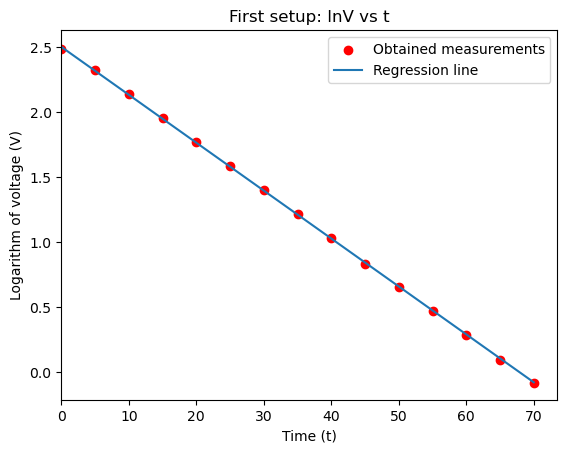

In [7]:
slope1, slope1_se, tau1, tau1_se, tau1_re = calculate_time_constant(times_1, V1_log, V1_log_abs, "First setup: lnV vs t", "plots/setup1.png", R1, C1)

In [8]:
print(f"Slope = {slope1} ± {slope1_se}")
print(f"Obtained value from the experiment: τ = {tau1:.2f} ± {tau1_se:.2f} s")
print(f"Expected value from the experiment setup: τ = {tau1_re}")

Slope = -0.03683379869536952 ± 0.00010845604051988876
Obtained value from the experiment: τ = 27.15 ± 0.08 s
Expected value from the experiment setup: τ = 30.0


### Second setup

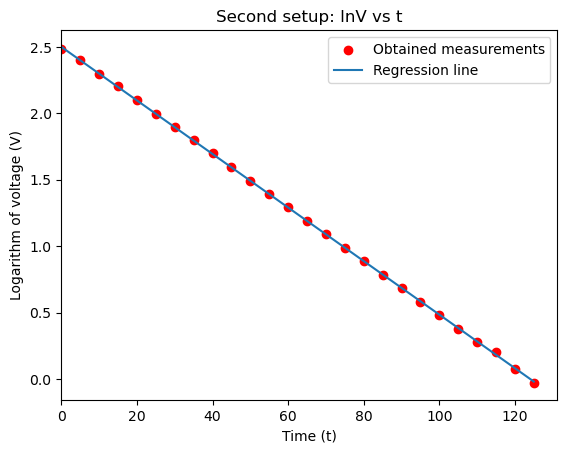

In [9]:
slope2, slope2_se, tau2, tau2_se, tau2_re = calculate_time_constant(times_2, V2_log, V2_log_abs, "Second setup: lnV vs t", "plots/setup2.png", R2, C2)

In [10]:
print(f"Slope = {slope2} ± {slope2_se}")
print(f"Obtained value from the experiment: τ = {tau2:.2f} ± {tau2_se:.2f} s")
print(f"Expected value from the experiment setup: τ = {tau2_re}")

Slope = -0.02016595957128759 ± 3.652399884572423e-05
Obtained value from the experiment: τ = 49.59 ± 0.09 s
Expected value from the experiment setup: τ = 60.0


### Third setup

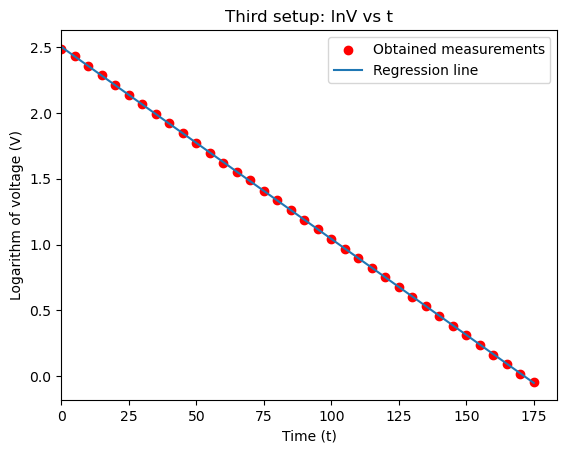

In [11]:
slope3, slope3_se, tau3, tau3_se, tau3_re = calculate_time_constant(times_3, V3_log, V3_log_abs, "Third setup: lnV vs t", "plots/setup3.png", R3, C3)

In [12]:
print(f"Slope = {slope3} ± {slope3_se}")
print(f"Obtained value from the experiment: τ = {tau3:.2f} ± {tau3_se:.2f} s")
print(f"Expected value from the experiment setup: τ = {tau3_re}")

Slope = -0.014574442240071279 ± 1.86383958763908e-05
Obtained value from the experiment: τ = 68.61 ± 0.09 s
Expected value from the experiment setup: τ = 90.0
